<!-- dom:TITLE: Week 35: Linear Regression and Review of Statistical Analysis and Probability Theory -->
# Week 35: Linear Regression and Review of Statistical Analysis and Probability Theory
<!-- dom:AUTHOR: Morten Hjorth-Jensen at Department of Physics, University of Oslo & Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University -->
<!-- Author: -->  
**Morten Hjorth-Jensen**, Department of Physics, University of Oslo and Department of Physics and Astronomy and National Superconducting Cyclotron Laboratory, Michigan State University

Date: **Sep 16, 2020**

Copyright 1999-2020, Morten Hjorth-Jensen. Released under CC Attribution-NonCommercial 4.0 license




## Plans for week 35, August 24-28

* Thursday: Introduction to ordinary Least Squares and derivation of basic equation

* Friday: Linear regression and statistical analysis and probability theory

## Thursday August 27

[Video of Lecture](https://www.uio.no/studier/emner/matnat/fys/FYS-STK4155/h20/forelesningsvideoer/LectureAug27.mp4?vrtx=view-as-webpage).


## Why Linear Regression (aka Ordinary Least Squares and family)

Fitting a continuous function with linear parameterization in terms of the parameters  $\boldsymbol{\beta}$.
* Method of choice for fitting a continuous function!

* Gives an excellent introduction to central Machine Learning features with **understandable pedagogical** links to other methods like **Neural Networks**, **Support Vector Machines** etc

* Analytical expression for the fitting parameters $\boldsymbol{\beta}$

* Analytical expressions for statistical propertiers like mean values, variances, confidence intervals and more

* Analytical relation with probabilistic interpretations 

* Easy to introduce basic concepts like bias-variance tradeoff, cross-validation, resampling and regularization techniques and many other ML topics

* Easy to code! And links well with classification problems and logistic regression and neural networks

* Allows for **easy** hands-on understanding of gradient descent methods

* and many more features

For more discussions of Ridge and Lasso regression, [Wessel van Wieringen's](https://arxiv.org/abs/1509.09169) article is highly recommended.
Similarly, [Mehta et al's article](https://arxiv.org/abs/1803.08823) is also recommended.


## Regression analysis, overarching aims

Regression modeling deals with the description of  the sampling distribution of a given random variable $y$ and how it varies as function of another variable or a set of such variables $\boldsymbol{x} =[x_0, x_1,\dots, x_{n-1}]^T$. 
The first variable is called the **dependent**, the **outcome** or the **response** variable while the set of variables $\boldsymbol{x}$ is called the independent variable, or the predictor variable or the explanatory variable. 

A regression model aims at finding a likelihood function $p(\boldsymbol{y}\vert \boldsymbol{x})$, that is the conditional distribution for $\boldsymbol{y}$ with a given $\boldsymbol{x}$. The estimation of  $p(\boldsymbol{y}\vert \boldsymbol{x})$ is made using a data set with 
* $n$ cases $i = 0, 1, 2, \dots, n-1$ 

* Response (target, dependent or outcome) variable $y_i$ with $i = 0, 1, 2, \dots, n-1$ 

* $p$ so-called explanatory (independent or predictor) variables $\boldsymbol{x}_i=[x_{i0}, x_{i1}, \dots, x_{ip-1}]$ with $i = 0, 1, 2, \dots, n-1$ and explanatory variables running from $0$ to $p-1$. See below for more explicit examples.   

 The goal of the regression analysis is to extract/exploit relationship between $\boldsymbol{y}$ and $\boldsymbol{x}$ in or to infer causal dependencies, approximations to the likelihood functions, functional relationships and to make predictions, making fits and many other things.



## Regression analysis, overarching aims II


Consider an experiment in which $p$ characteristics of $n$ samples are
measured. The data from this experiment, for various explanatory variables $p$ are normally represented by a matrix  
$\mathbf{X}$.

The matrix $\mathbf{X}$ is called the *design
matrix*. Additional information of the samples is available in the
form of $\boldsymbol{y}$ (also as above). The variable $\boldsymbol{y}$ is
generally referred to as the *response variable*. The aim of
regression analysis is to explain $\boldsymbol{y}$ in terms of
$\boldsymbol{X}$ through a functional relationship like $y_i =
f(\mathbf{X}_{i,\ast})$. When no prior knowledge on the form of
$f(\cdot)$ is available, it is common to assume a linear relationship
between $\boldsymbol{X}$ and $\boldsymbol{y}$. This assumption gives rise to
the *linear regression model* where $\boldsymbol{\beta} = [\beta_0, \ldots,
\beta_{p-1}]^{T}$ are the *regression parameters*. 

Linear regression gives us a set of analytical equations for the parameters $\beta_j$.





## Examples
In order to understand the relation among the predictors $p$, the set of data $n$ and the target (outcome, output etc) $\boldsymbol{y}$,
consider the model we discussed for describing nuclear binding energies. 

There we assumed that we could parametrize the data using a polynomial approximation based on the liquid drop model.
Assuming

$$
BE(A) = a_0+a_1A+a_2A^{2/3}+a_3A^{-1/3}+a_4A^{-1},
$$

we have five predictors, that is the intercept, the $A$ dependent term, the $A^{2/3}$ term and the $A^{-1/3}$ and $A^{-1}$ terms.
This gives $p=0,1,2,3,4$. Furthermore we have $n$ entries for each predictor. It means that our design matrix is a 
$p\times n$ matrix $\boldsymbol{X}$.

Here the predictors are based on a model we have made. A popular data set which is widely encountered in ML applications is the
so-called [credit card default data from Taiwan](https://www.sciencedirect.com/science/article/pii/S0957417407006719?via%3Dihub). The data set contains data on $n=30000$ credit card holders with predictors like gender, marital status, age, profession, education, etc. In total there are $24$ such predictors or attributes leading to a design matrix of dimensionality $24 \times 30000$. This is however a classification problem and we will come back to it when we discuss Logistic Regression.







## General linear models
Before we proceed let us study a case from linear algebra where we aim at fitting a set of data $\boldsymbol{y}=[y_0,y_1,\dots,y_{n-1}]$. We could think of these data as a result of an experiment or a complicated numerical experiment. These data are functions of a series of variables $\boldsymbol{x}=[x_0,x_1,\dots,x_{n-1}]$, that is $y_i = y(x_i)$ with $i=0,1,2,\dots,n-1$. The variables $x_i$ could represent physical quantities like time, temperature, position etc. We assume that $y(x)$ is a smooth function. 

Since obtaining these data points may not be trivial, we want to use these data to fit a function which can allow us to make predictions for values of $y$ which are not in the present set. The perhaps simplest approach is to assume we can parametrize our function in terms of a polynomial of degree $n-1$ with $n$ points, that is

$$
y=y(x) \rightarrow y(x_i)=\tilde{y}_i+\epsilon_i=\sum_{j=0}^{n-1} \beta_j x_i^j+\epsilon_i,
$$

where $\epsilon_i$ is the error in our approximation.




## Rewriting the fitting procedure as a linear algebra problem
For every set of values $y_i,x_i$ we have thus the corresponding set of equations

$$
\begin{align*}
y_0&=\beta_0+\beta_1x_0^1+\beta_2x_0^2+\dots+\beta_{n-1}x_0^{n-1}+\epsilon_0\\
y_1&=\beta_0+\beta_1x_1^1+\beta_2x_1^2+\dots+\beta_{n-1}x_1^{n-1}+\epsilon_1\\
y_2&=\beta_0+\beta_1x_2^1+\beta_2x_2^2+\dots+\beta_{n-1}x_2^{n-1}+\epsilon_2\\
\dots & \dots \\
y_{n-1}&=\beta_0+\beta_1x_{n-1}^1+\beta_2x_{n-1}^2+\dots+\beta_{n-1}x_{n-1}^{n-1}+\epsilon_{n-1}.\\
\end{align*}
$$

## Rewriting the fitting procedure as a linear algebra problem, more details
Defining the vectors

$$
\boldsymbol{y} = [y_0,y_1, y_2,\dots, y_{n-1}]^T,
$$

and

$$
\boldsymbol{\beta} = [\beta_0,\beta_1, \beta_2,\dots, \beta_{n-1}]^T,
$$

and

$$
\boldsymbol{\epsilon} = [\epsilon_0,\epsilon_1, \epsilon_2,\dots, \epsilon_{n-1}]^T,
$$

and the design matrix

$$
\boldsymbol{X}=
\begin{bmatrix} 
1& x_{0}^1 &x_{0}^2& \dots & \dots &x_{0}^{n-1}\\
1& x_{1}^1 &x_{1}^2& \dots & \dots &x_{1}^{n-1}\\
1& x_{2}^1 &x_{2}^2& \dots & \dots &x_{2}^{n-1}\\                      
\dots& \dots &\dots& \dots & \dots &\dots\\
1& x_{n-1}^1 &x_{n-1}^2& \dots & \dots &x_{n-1}^{n-1}\\
\end{bmatrix}
$$

we can rewrite our equations as

$$
\boldsymbol{y} = \boldsymbol{X}\boldsymbol{\beta}+\boldsymbol{\epsilon}.
$$

The above design matrix is called a [Vandermonde matrix](https://en.wikipedia.org/wiki/Vandermonde_matrix).




## Generalizing the fitting procedure as a linear algebra problem

We are obviously not limited to the above polynomial expansions.  We
could replace the various powers of $x$ with elements of Fourier
series or instead of $x_i^j$ we could have $\cos{(j x_i)}$ or $\sin{(j
x_i)}$, or time series or other orthogonal functions.  For every set
of values $y_i,x_i$ we can then generalize the equations to

$$
\begin{align*}
y_0&=\beta_0x_{00}+\beta_1x_{01}+\beta_2x_{02}+\dots+\beta_{n-1}x_{0n-1}+\epsilon_0\\
y_1&=\beta_0x_{10}+\beta_1x_{11}+\beta_2x_{12}+\dots+\beta_{n-1}x_{1n-1}+\epsilon_1\\
y_2&=\beta_0x_{20}+\beta_1x_{21}+\beta_2x_{22}+\dots+\beta_{n-1}x_{2n-1}+\epsilon_2\\
\dots & \dots \\
y_{i}&=\beta_0x_{i0}+\beta_1x_{i1}+\beta_2x_{i2}+\dots+\beta_{n-1}x_{in-1}+\epsilon_i\\
\dots & \dots \\
y_{n-1}&=\beta_0x_{n-1,0}+\beta_1x_{n-1,2}+\beta_2x_{n-1,2}+\dots+\beta_{n-1}x_{n-1,n-1}+\epsilon_{n-1}.\\
\end{align*}
$$

**Note that we have $p=n$ here. The matrix is symmetric. This is generally not the case!**




## Generalizing the fitting procedure as a linear algebra problem
We redefine in turn the matrix $\boldsymbol{X}$ as

$$
\boldsymbol{X}=
\begin{bmatrix} 
x_{00}& x_{01} &x_{02}& \dots & \dots &x_{0,n-1}\\
x_{10}& x_{11} &x_{12}& \dots & \dots &x_{1,n-1}\\
x_{20}& x_{21} &x_{22}& \dots & \dots &x_{2,n-1}\\                      
\dots& \dots &\dots& \dots & \dots &\dots\\
x_{n-1,0}& x_{n-1,1} &x_{n-1,2}& \dots & \dots &x_{n-1,n-1}\\
\end{bmatrix}
$$

and without loss of generality we rewrite again  our equations as

$$
\boldsymbol{y} = \boldsymbol{X}\boldsymbol{\beta}+\boldsymbol{\epsilon}.
$$

The left-hand side of this equation is kwown. Our error vector $\boldsymbol{\epsilon}$ and the parameter vector $\boldsymbol{\beta}$ are our unknow quantities. How can we obtain the optimal set of $\beta_i$ values?




## Optimizing our parameters
We have defined the matrix $\boldsymbol{X}$ via the equations

$$
\begin{align*}
y_0&=\beta_0x_{00}+\beta_1x_{01}+\beta_2x_{02}+\dots+\beta_{n-1}x_{0n-1}+\epsilon_0\\
y_1&=\beta_0x_{10}+\beta_1x_{11}+\beta_2x_{12}+\dots+\beta_{n-1}x_{1n-1}+\epsilon_1\\
y_2&=\beta_0x_{20}+\beta_1x_{21}+\beta_2x_{22}+\dots+\beta_{n-1}x_{2n-1}+\epsilon_1\\
\dots & \dots \\
y_{i}&=\beta_0x_{i0}+\beta_1x_{i1}+\beta_2x_{i2}+\dots+\beta_{n-1}x_{in-1}+\epsilon_1\\
\dots & \dots \\
y_{n-1}&=\beta_0x_{n-1,0}+\beta_1x_{n-1,2}+\beta_2x_{n-1,2}+\dots+\beta_{n-1}x_{n-1,n-1}+\epsilon_{n-1}.\\
\end{align*}
$$

As we noted above, we stayed with a system with the design matrix 
 $\boldsymbol{X}\in {\mathbb{R}}^{n\times n}$, that is we have $p=n$. For reasons to come later (algorithmic arguments) we will hereafter define 
our matrix as $\boldsymbol{X}\in {\mathbb{R}}^{n\times p}$, with the predictors refering to the column numbers and the entries $n$ being the row elements.




## Our model for the nuclear binding energies

In our [introductory notes](https://compphysics.github.io/MachineLearning/doc/pub/How2ReadData/html/How2ReadData.html) we looked at the so-called [liquid drop model](https://en.wikipedia.org/wiki/Semi-empirical_mass_formula). Let us remind ourselves about what we did by looking at the code.

We restate the parts of the code we are most interested in.

In [2]:
%matplotlib inline

# Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import os

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

infile = open(data_path("MassEval2016.dat"),'r')


# Read the experimental data with Pandas
Masses = pd.read_fwf(infile, usecols=(2,3,4,6,11),
              names=('N', 'Z', 'A', 'Element', 'Ebinding'),
              widths=(1,3,5,5,5,1,3,4,1,13,11,11,9,1,2,11,9,1,3,1,12,11,1),
              header=39,
              index_col=False)

# Extrapolated values are indicated by '#' in place of the decimal place, so
# the Ebinding column won't be numeric. Coerce to float and drop these entries.
Masses['Ebinding'] = pd.to_numeric(Masses['Ebinding'], errors='coerce')
Masses = Masses.dropna()
# Convert from keV to MeV.
Masses['Ebinding'] /= 1000

# Group the DataFrame by nucleon number, A.
Masses = Masses.groupby('A')
# Find the rows of the grouped DataFrame with the maximum binding energy.
Masses = Masses.apply(lambda t: t[t.Ebinding==t.Ebinding.max()])
A = Masses['A']
Z = Masses['Z']
N = Masses['N']
Element = Masses['Element']
Energies = Masses['Ebinding']

# Now we set up the design matrix X
X = np.zeros((len(A),5))
X[:,0] = 1
X[:,1] = A
X[:,2] = A**(2.0/3.0)
X[:,3] = A**(-1.0/3.0)
X[:,4] = A**(-1.0)
# Then nice printout using pandas
DesignMatrix = pd.DataFrame(X)
DesignMatrix.index = A
DesignMatrix.columns = ['1', 'A', 'A^(2/3)', 'A^(-1/3)', '1/A']
display(DesignMatrix)

,1,A,A^(2/3),A^(-1/3),1/A
A,,,,,
1,1.0,1.0,1.000000,1.000000,1.000000
2,1.0,2.0,1.587401,0.793701,0.500000
3,1.0,3.0,2.080084,0.693361,0.333333
4,1.0,4.0,2.519842,0.629961,0.250000
5,1.0,5.0,2.924018,0.584804,0.200000
...,...,...,...,...,...
264,1.0,264.0,41.153106,0.155883,0.003788
265,1.0,265.0,41.256962,0.155687,0.003774
266,1.0,266.0,41.360688,0.155491,0.003759


With $\boldsymbol{\beta}\in {\mathbb{R}}^{p\times 1}$, it means that we will hereafter write our equations for the approximation as

$$
\boldsymbol{\tilde{y}}= \boldsymbol{X}\boldsymbol{\beta},
$$

throughout these lectures. 


## Optimizing our parameters, more details
With the above we use the design matrix to define the approximation $\boldsymbol{\tilde{y}}$ via the unknown quantity $\boldsymbol{\beta}$ as

$$
\boldsymbol{\tilde{y}}= \boldsymbol{X}\boldsymbol{\beta},
$$

and in order to find the optimal parameters $\beta_i$ instead of solving the above linear algebra problem, we define a function which gives a measure of the spread between the values $y_i$ (which represent hopefully the exact values) and the parameterized values $\tilde{y}_i$, namely

$$
C(\boldsymbol{\beta})=\frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2=\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{\tilde{y}}\right)^T\left(\boldsymbol{y}-\boldsymbol{\tilde{y}}\right)\right\},
$$

or using the matrix $\boldsymbol{X}$ and in a more compact matrix-vector notation as

$$
C(\boldsymbol{\beta})=\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

This function is one possible way to define the so-called cost function.



It is also common to define
the function $C$ as

$$
C(\boldsymbol{\beta})=\frac{1}{2n}\sum_{i=0}^{n-1}\left(y_i-\tilde{y}_i\right)^2,
$$

since when taking the first derivative with respect to the unknown parameters $\beta$, the factor of $2$ cancels out.




## Interpretations and optimizing our parameters

The function

$$
C(\boldsymbol{\beta})=\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\},
$$

can be linked to the variance of the quantity $y_i$ if we interpret the latter as the mean value. 
When linking (see the discussion below) with the maximum likelihood approach below, we will indeed interpret $y_i$ as a mean value

$$
y_{i}=\langle y_i \rangle = \beta_0x_{i,0}+\beta_1x_{i,1}+\beta_2x_{i,2}+\dots+\beta_{n-1}x_{i,n-1}+\epsilon_i,
$$

where $\langle y_i \rangle$ is the mean value. Keep in mind also that
till now we have treated $y_i$ as the exact value. Normally, the
response (dependent or outcome) variable $y_i$ the outcome of a
numerical experiment or another type of experiment and is thus only an
approximation to the true value. It is then always accompanied by an
error estimate, often limited to a statistical error estimate given by
the standard deviation discussed earlier. In the discussion here we
will treat $y_i$ as our exact value for the response variable.

In order to find the parameters $\beta_i$ we will then minimize the spread of $C(\boldsymbol{\beta})$, that is we are going to solve the problem

$$
{\displaystyle \min_{\boldsymbol{\beta}\in
{\mathbb{R}}^{p}}}\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)\right\}.
$$

In practical terms it means we will require

$$
\frac{\partial C(\boldsymbol{\beta})}{\partial \beta_j} = \frac{\partial }{\partial \beta_j}\left[ \frac{1}{n}\sum_{i=0}^{n-1}\left(y_i-\beta_0x_{i,0}-\beta_1x_{i,1}-\beta_2x_{i,2}-\dots-\beta_{n-1}x_{i,n-1}\right)^2\right]=0,
$$

which results in

$$
\frac{\partial C(\boldsymbol{\beta})}{\partial \beta_j} = -\frac{2}{n}\left[ \sum_{i=0}^{n-1}x_{ij}\left(y_i-\beta_0x_{i,0}-\beta_1x_{i,1}-\beta_2x_{i,2}-\dots-\beta_{n-1}x_{i,n-1}\right)\right]=0,
$$

or in a matrix-vector form as

$$
\frac{\partial C(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} = 0 = \boldsymbol{X}^T\left( \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right).
$$

## Interpretations and optimizing our parameters
We can rewrite

$$
\frac{\partial C(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} = 0 = \boldsymbol{X}^T\left( \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right),
$$

as

$$
\boldsymbol{X}^T\boldsymbol{y} = \boldsymbol{X}^T\boldsymbol{X}\boldsymbol{\beta},
$$

and if the matrix $\boldsymbol{X}^T\boldsymbol{X}$ is invertible we have the solution

$$
\boldsymbol{\beta} =\left(\boldsymbol{X}^T\boldsymbol{X}\right)^{-1}\boldsymbol{X}^T\boldsymbol{y}.
$$

We note also that since our design matrix is defined as $\boldsymbol{X}\in
{\mathbb{R}}^{n\times p}$, the product $\boldsymbol{X}^T\boldsymbol{X} \in
{\mathbb{R}}^{p\times p}$.  In the above case we have that $p \ll n$,
in our case $p=5$ meaning that we end up with inverting a small
$5\times 5$ matrix. This is a rather common situation, in many cases we end up with low-dimensional
matrices to invert. The methods discussed here and for many other
supervised learning algorithms like classification with logistic
regression or support vector machines, exhibit dimensionalities which
allow for the usage of direct linear algebra methods such as **LU** decomposition or **Singular Value Decomposition** (SVD) for finding the inverse of the matrix
$\boldsymbol{X}^T\boldsymbol{X}$.



**Small question**: Do you think the example we have at hand here (the nuclear binding energies) can lead to problems in inverting the matrix  $\boldsymbol{X}^T\boldsymbol{X}$? What kind of problems can we expect?



## Some useful matrix and vector expressions

The following matrix and vector relation will be useful here and for the rest of the course. Vectors are always written as boldfaced lower case letters and 
matrices as upper case boldfaced letters.

2
6
 
<
<
<
!
!
M
A
T
H
_
B
L
O
C
K

2
7
 
<
<
<
!
!
M
A
T
H
_
B
L
O
C
K

2
8
 
<
<
<
!
!
M
A
T
H
_
B
L
O
C
K

$$
\frac{\partial \log{\vert\boldsymbol{A}\vert}}{\partial \boldsymbol{A}} = (\boldsymbol{A}^{-1})^T.
$$

## Interpretations and optimizing our parameters
The residuals $\boldsymbol{\epsilon}$ are in turn given by

$$
\boldsymbol{\epsilon} = \boldsymbol{y}-\boldsymbol{\tilde{y}} = \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta},
$$

and with

$$
\boldsymbol{X}^T\left( \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)= 0,
$$

we have

$$
\boldsymbol{X}^T\boldsymbol{\epsilon}=\boldsymbol{X}^T\left( \boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right)= 0,
$$

meaning that the solution for $\boldsymbol{\beta}$ is the one which minimizes the residuals.  Later we will link this with the maximum likelihood approach.




Let us now return to our nuclear binding energies and simply code the above equations. 

## Own code for Ordinary Least Squares

It is rather straightforward to implement the matrix inversion and obtain the parameters $\boldsymbol{\beta}$. After having defined the matrix $\boldsymbol{X}$ we simply need to 
write

In [3]:
# matrix inversion to find beta
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Energies)
# and then make the prediction
ytilde = X @ beta

Alternatively, you can use the least squares functionality in **Numpy** as

In [4]:
fit = np.linalg.lstsq(X, Energies, rcond =None)[0]
ytildenp = np.dot(fit,X.T)

And finally we plot our fit with and compare with data

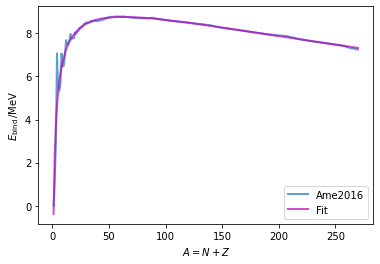

In [5]:
Masses['Eapprox']  = ytilde
# Generate a plot comparing the experimental with the fitted values values.
fig, ax = plt.subplots()
ax.set_xlabel(r'$A = N + Z$')
ax.set_ylabel(r'$E_\mathrm{bind}\,/\mathrm{MeV}$')
ax.plot(Masses['A'], Masses['Ebinding'], alpha=0.7, lw=2,
            label='Ame2016')
ax.plot(Masses['A'], Masses['Eapprox'], alpha=0.7, lw=2, c='m',
            label='Fit')
ax.legend()
save_fig("Masses2016OLS")
plt.show()

## Adding error analysis and training set up

We can easily test our fit by computing the $R2$ score that we discussed in connection with the functionality of **Scikit-Learn** in the introductory slides.
Since we are not using **Scikit-Learn** here we can define our own $R2$ function as

In [6]:
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)

and we would be using it as

In [7]:
print(R2(Energies,ytilde))

0.9547578478889096


We can easily add our **MSE** score as

In [8]:
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

print(MSE(Energies,ytilde))

0.03787596148305234


and finally the relative error as

In [9]:
def RelativeError(y_data,y_model):
    return abs((y_data-y_model)/y_data)
print(RelativeError(Energies, ytilde))

A        
1    0            inf
2    1       1.123190
3    2       0.327631
4    6       0.344172
5    9       0.044402
               ...   
264  3304    0.009911
265  3310    0.009154
266  3317    0.007824
269  3338    0.011347
270  3344    0.009790
Name: Ebinding, Length: 267, dtype: float64


## The $\chi^2$ function

Normally, the response (dependent or outcome) variable $y_i$ is the
outcome of a numerical experiment or another type of experiment and is
thus only an approximation to the true value. It is then always
accompanied by an error estimate, often limited to a statistical error
estimate given by the standard deviation discussed earlier. In the
discussion here we will treat $y_i$ as our exact value for the
response variable.

Introducing the standard deviation $\sigma_i$ for each measurement
$y_i$, we define now the $\chi^2$ function (omitting the $1/n$ term)
as

$$
\chi^2(\boldsymbol{\beta})=\frac{1}{n}\sum_{i=0}^{n-1}\frac{\left(y_i-\tilde{y}_i\right)^2}{\sigma_i^2}=\frac{1}{n}\left\{\left(\boldsymbol{y}-\boldsymbol{\tilde{y}}\right)^T\frac{1}{\boldsymbol{\Sigma^2}}\left(\boldsymbol{y}-\boldsymbol{\tilde{y}}\right)\right\},
$$

where the matrix $\boldsymbol{\Sigma}$ is a diagonal matrix with $\sigma_i$ as matrix elements.



## The $\chi^2$ function

In order to find the parameters $\beta_i$ we will then minimize the spread of $\chi^2(\boldsymbol{\beta})$ by requiring

$$
\frac{\partial \chi^2(\boldsymbol{\beta})}{\partial \beta_j} = \frac{\partial }{\partial \beta_j}\left[ \frac{1}{n}\sum_{i=0}^{n-1}\left(\frac{y_i-\beta_0x_{i,0}-\beta_1x_{i,1}-\beta_2x_{i,2}-\dots-\beta_{n-1}x_{i,n-1}}{\sigma_i}\right)^2\right]=0,
$$

which results in

$$
\frac{\partial \chi^2(\boldsymbol{\beta})}{\partial \beta_j} = -\frac{2}{n}\left[ \sum_{i=0}^{n-1}\frac{x_{ij}}{\sigma_i}\left(\frac{y_i-\beta_0x_{i,0}-\beta_1x_{i,1}-\beta_2x_{i,2}-\dots-\beta_{n-1}x_{i,n-1}}{\sigma_i}\right)\right]=0,
$$

or in a matrix-vector form as

$$
\frac{\partial \chi^2(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} = 0 = \boldsymbol{A}^T\left( \boldsymbol{b}-\boldsymbol{A}\boldsymbol{\beta}\right).
$$

where we have defined the matrix $\boldsymbol{A} =\boldsymbol{X}/\boldsymbol{\Sigma}$ with matrix elements $a_{ij} = x_{ij}/\sigma_i$ and the vector $\boldsymbol{b}$ with elements $b_i = y_i/\sigma_i$.



## The $\chi^2$ function

We can rewrite

$$
\frac{\partial \chi^2(\boldsymbol{\beta})}{\partial \boldsymbol{\beta}} = 0 = \boldsymbol{A}^T\left( \boldsymbol{b}-\boldsymbol{A}\boldsymbol{\beta}\right),
$$

as

$$
\boldsymbol{A}^T\boldsymbol{b} = \boldsymbol{A}^T\boldsymbol{A}\boldsymbol{\beta},
$$

and if the matrix $\boldsymbol{A}^T\boldsymbol{A}$ is invertible we have the solution

$$
\boldsymbol{\beta} =\left(\boldsymbol{A}^T\boldsymbol{A}\right)^{-1}\boldsymbol{A}^T\boldsymbol{b}.
$$

## The $\chi^2$ function

If we then introduce the matrix

$$
\boldsymbol{H} =  \left(\boldsymbol{A}^T\boldsymbol{A}\right)^{-1},
$$

we have then the following expression for the parameters $\beta_j$ (the matrix elements of $\boldsymbol{H}$ are $h_{ij}$)

$$
\beta_j = \sum_{k=0}^{p-1}h_{jk}\sum_{i=0}^{n-1}\frac{y_i}{\sigma_i}\frac{x_{ik}}{\sigma_i} = \sum_{k=0}^{p-1}h_{jk}\sum_{i=0}^{n-1}b_ia_{ik}
$$

We state without proof the expression for the uncertainty  in the parameters $\beta_j$ as (we leave this as an exercise)

$$
\sigma^2(\beta_j) = \sum_{i=0}^{n-1}\sigma_i^2\left( \frac{\partial \beta_j}{\partial y_i}\right)^2,
$$

resulting in

$$
\sigma^2(\beta_j) = \left(\sum_{k=0}^{p-1}h_{jk}\sum_{i=0}^{n-1}a_{ik}\right)\left(\sum_{l=0}^{p-1}h_{jl}\sum_{m=0}^{n-1}a_{ml}\right) = h_{jj}!
$$

## The $\chi^2$ function
The first step here is to approximate the function $y$ with a first-order polynomial, that is we write

$$
y=y(x) \rightarrow y(x_i) \approx \beta_0+\beta_1 x_i.
$$

By computing the derivatives of $\chi^2$ with respect to $\beta_0$ and $\beta_1$ show that these are given by

$$
\frac{\partial \chi^2(\boldsymbol{\beta})}{\partial \beta_0} = -2\left[ \frac{1}{n}\sum_{i=0}^{n-1}\left(\frac{y_i-\beta_0-\beta_1x_{i}}{\sigma_i^2}\right)\right]=0,
$$

and

$$
\frac{\partial \chi^2(\boldsymbol{\beta})}{\partial \beta_1} = -\frac{2}{n}\left[ \sum_{i=0}^{n-1}x_i\left(\frac{y_i-\beta_0-\beta_1x_{i}}{\sigma_i^2}\right)\right]=0.
$$

## The $\chi^2$ function

For a linear fit (a first-order polynomial) we don't need to invert a matrix!!  
Defining

$$
\gamma =  \sum_{i=0}^{n-1}\frac{1}{\sigma_i^2},
$$

$$
\gamma_x =  \sum_{i=0}^{n-1}\frac{x_{i}}{\sigma_i^2},
$$

$$
\gamma_y = \sum_{i=0}^{n-1}\left(\frac{y_i}{\sigma_i^2}\right),
$$

$$
\gamma_{xx} =  \sum_{i=0}^{n-1}\frac{x_ix_{i}}{\sigma_i^2},
$$

$$
\gamma_{xy} = \sum_{i=0}^{n-1}\frac{y_ix_{i}}{\sigma_i^2},
$$

we obtain

$$
\beta_0 = \frac{\gamma_{xx}\gamma_y-\gamma_x\gamma_y}{\gamma\gamma_{xx}-\gamma_x^2},
$$

$$
\beta_1 = \frac{\gamma_{xy}\gamma-\gamma_x\gamma_y}{\gamma\gamma_{xx}-\gamma_x^2}.
$$

This approach (different linear and non-linear regression) suffers
often from both being underdetermined and overdetermined in the
unknown coefficients $\beta_i$.  A better approach is to use the
Singular Value Decomposition (SVD) method discussed below. Or using
Lasso and Ridge regression. See below.




## Fitting an Equation of State for Dense Nuclear Matter

Before we continue, let us introduce yet another example. We are going to fit the
nuclear equation of state using results from many-body calculations.
The equation of state we have made available here, as function of
density, has been derived using modern nucleon-nucleon potentials with
[the addition of three-body
forces](https://www.sciencedirect.com/science/article/pii/S0370157399001106). This
time the file is presented as a standard **csv** file.

The beginning of the Python code here is similar to what you have seen
before, with the same initializations and declarations. We use also
**pandas** again, rather extensively in order to organize our data.

The difference now is that we use **Scikit-Learn's** regression tools
instead of our own matrix inversion implementation. Furthermore, we
sneak in **Ridge** regression (to be discussed below) which includes a
hyperparameter $\lambda$, also to be explained below.

## The code

Mean squared error: 12.36
Variance score: 1.00
Mean absolute error: 2.83
[   0.          618.32047562 -861.13519106 1404.91549644] -11.057088709963523
Mean squared error: 197.93
Variance score: 1.00
Mean absolute error: 11.69
[  0.          28.18220995 282.79902342 842.30879705] 12.946893955207997


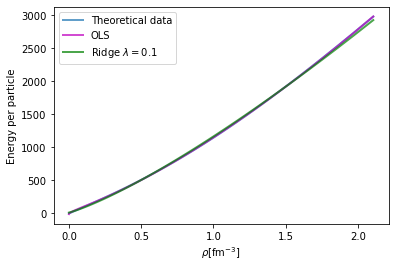

In [10]:
# Common imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

infile = open(data_path("EoS.csv"),'r')

# Read the EoS data as  csv file and organize the data into two arrays with density and energies
EoS = pd.read_csv(infile, names=('Density', 'Energy'))
EoS['Energy'] = pd.to_numeric(EoS['Energy'], errors='coerce')
EoS = EoS.dropna()
Energies = EoS['Energy']
Density = EoS['Density']
#  The design matrix now as function of various polytrops
X = np.zeros((len(Density),4))
X[:,3] = Density**(4.0/3.0)
X[:,2] = Density
X[:,1] = Density**(2.0/3.0)
X[:,0] = 1

# We use now Scikit-Learn's linear regressor and ridge regressor
# OLS part
clf = skl.LinearRegression().fit(X, Energies)
ytilde = clf.predict(X)
EoS['Eols']  = ytilde
# The mean squared error                               
print("Mean squared error: %.2f" % mean_squared_error(Energies, ytilde))
# Explained variance score: 1 is perfect prediction                                 
print('Variance score: %.2f' % r2_score(Energies, ytilde))
# Mean absolute error                                                           
print('Mean absolute error: %.2f' % mean_absolute_error(Energies, ytilde))
print(clf.coef_, clf.intercept_)

# The Ridge regression with a hyperparameter lambda = 0.1
_lambda = 0.1
clf_ridge = skl.Ridge(alpha=_lambda).fit(X, Energies)
yridge = clf_ridge.predict(X)
EoS['Eridge']  = yridge
# The mean squared error                               
print("Mean squared error: %.2f" % mean_squared_error(Energies, yridge))
# Explained variance score: 1 is perfect prediction                                 
print('Variance score: %.2f' % r2_score(Energies, yridge))
# Mean absolute error                                                           
print('Mean absolute error: %.2f' % mean_absolute_error(Energies, yridge))
print(clf_ridge.coef_, clf_ridge.intercept_)

fig, ax = plt.subplots()
ax.set_xlabel(r'$\rho[\mathrm{fm}^{-3}]$')
ax.set_ylabel(r'Energy per particle')
ax.plot(EoS['Density'], EoS['Energy'], alpha=0.7, lw=2,
            label='Theoretical data')
ax.plot(EoS['Density'], EoS['Eols'], alpha=0.7, lw=2, c='m',
            label='OLS')
ax.plot(EoS['Density'], EoS['Eridge'], alpha=0.7, lw=2, c='g',
            label='Ridge $\lambda = 0.1$')
ax.legend()
save_fig("EoSfitting")
plt.show()

The above simple polynomial in density $\rho$ gives an excellent fit
to the data. 

We note also that there is a small deviation between the
standard OLS and the Ridge regression at higher densities. We discuss this in more detail
below.


## Splitting our Data in Training and Test data

It is normal in essentially all Machine Learning studies to split the
data in a training set and a test set (sometimes also an additional
validation set).  **Scikit-Learn** has an own function for this. There
is no explicit recipe for how much data should be included as training
data and say test data.  An accepted rule of thumb is to use
approximately $2/3$ to $4/5$ of the data as training data. We will
postpone a discussion of this splitting to the end of these notes and
our discussion of the so-called **bias-variance** tradeoff. Here we
limit ourselves to repeat the above equation of state fitting example
but now splitting the data into a training set and a test set.

In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_data)) ** 2)
def MSE(y_data,y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

infile = open(data_path("EoS.csv"),'r')

# Read the EoS data as  csv file and organized into two arrays with density and energies
EoS = pd.read_csv(infile, names=('Density', 'Energy'))
EoS['Energy'] = pd.to_numeric(EoS['Energy'], errors='coerce')
EoS = EoS.dropna()
Energies = EoS['Energy']
Density = EoS['Density']
#  The design matrix now as function of various polytrops
X = np.zeros((len(Density),5))
X[:,0] = 1
X[:,1] = Density**(2.0/3.0)
X[:,2] = Density
X[:,3] = Density**(4.0/3.0)
X[:,4] = Density**(5.0/3.0)
# We split the data in test and training data
X_train, X_test, y_train, y_test = train_test_split(X, Energies, test_size=0.2)
# matrix inversion to find beta
beta = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
# and then make the prediction
ytilde = X_train @ beta
print("Training R2")
print(R2(y_train,ytilde))
print("Training MSE")
print(MSE(y_train,ytilde))
ypredict = X_test @ beta
print("Test R2")
print(R2(y_test,ypredict))
print("Test MSE")
print(MSE(y_test,ypredict))

Training R2
0.9999936913787534
Training MSE
2.4029973213885385
Test R2
0.9999140621935813
Test MSE
60.480439204729514


<!-- !split  -->
## The Boston housing data example

The Boston housing  
data set was originally a part of UCI Machine Learning Repository
and has been removed now. The data set is now included in **Scikit-Learn**'s 
library.  There are 506 samples and 13 feature (predictor) variables
in this data set. The objective is to predict the value of prices of
the house using the features (predictors) listed here.

The features/predictors are
1. CRIM: Per capita crime rate by town

2. ZN: Proportion of residential land zoned for lots over 25000 square feet

3. INDUS: Proportion of non-retail business acres per town

4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

5. NOX: Nitric oxide concentration (parts per 10 million)

6. RM: Average number of rooms per dwelling

7. AGE: Proportion of owner-occupied units built prior to 1940

8. DIS: Weighted distances to five Boston employment centers

9. RAD: Index of accessibility to radial highways

10. TAX: Full-value property tax rate per USD10000

11. B: $1000(Bk - 0.63)^2$, where $Bk$ is the proportion of [people of African American descent] by town

12. LSTAT: Percentage of lower status of the population

13. MEDV: Median value of owner-occupied homes in USD 1000s

## Housing data, the code
We start by importing the libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns

and load the Boston Housing DataSet from **Scikit-Learn**

In [13]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

# boston_dataset is a dictionary
# let's check what it contains
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Then we invoke Pandas

In [14]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()
boston['MEDV'] = boston_dataset.target

and preprocess the data

In [15]:
# check for missing values in all the columns
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

We can then visualize the data

/Users/mhjensen/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


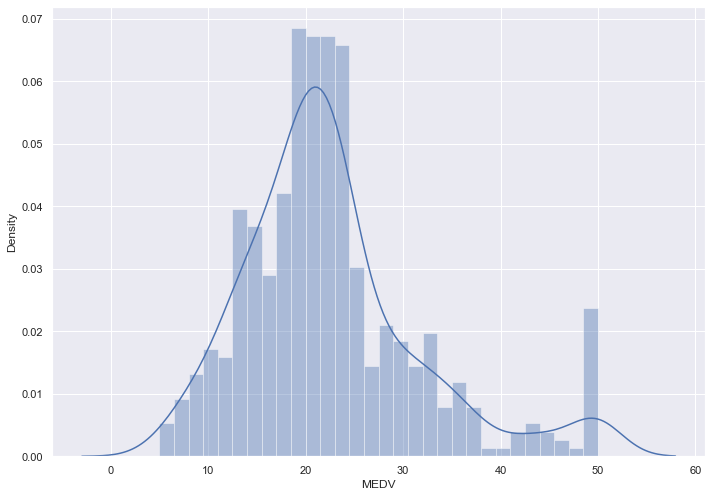

In [16]:
# set the size of the figure
sns.set(rc={'figure.figsize':(11.7,8.27)})

# plot a histogram showing the distribution of the target values
sns.distplot(boston['MEDV'], bins=30)
plt.show()

It is now useful to look at the correlation matrix

<AxesSubplot:>

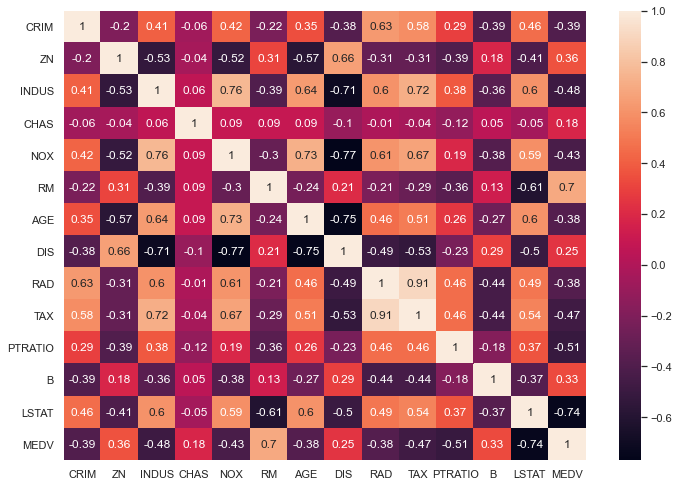

In [17]:
# compute the pair wise correlation for all columns  
correlation_matrix = boston.corr().round(2)
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

From the above coorelation plot we can see that **MEDV** is strongly correlated to **LSTAT** and  **RM**. We see also that **RAD** and **TAX** are stronly correlated, but we don't include this in our features together to avoid multi-colinearity

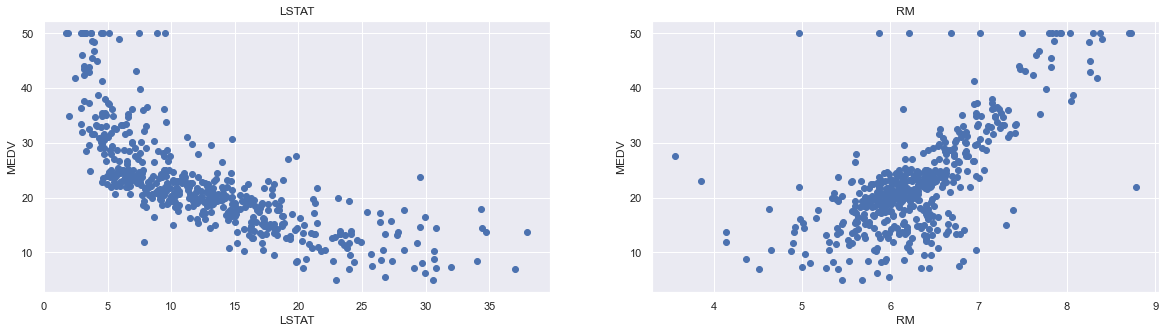

In [18]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

Now we start training our model

In [19]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

We split the data into training and test sets

In [20]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


Then we use the linear regression functionality from **Scikit-Learn**

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lin_model.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.637129335071195
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702912
R2 score is 0.6628996975186952


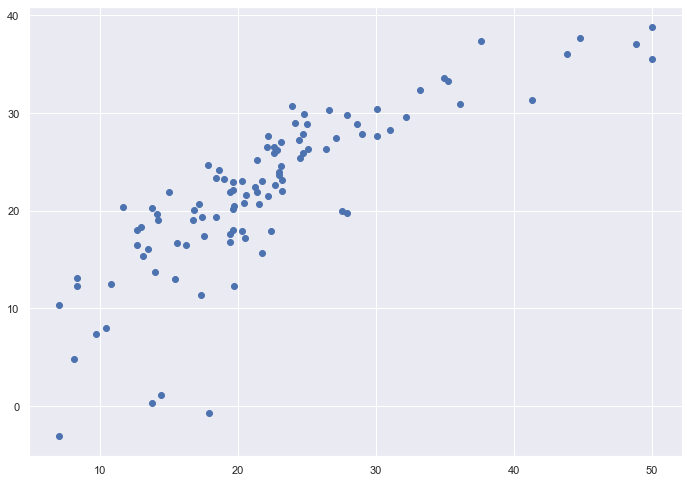

In [22]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(Y_test, y_test_predict)
plt.show()

## Reducing the number of degrees of freedom, overarching view

Many Machine Learning problems involve thousands or even millions of
features for each training instance. Not only does this make training
extremely slow, it can also make it much harder to find a good
solution, as we will see. This problem is often referred to as the
curse of dimensionality.  Fortunately, in real-world problems, it is
often possible to reduce the number of features considerably, turning
an intractable problem into a tractable one.

Later  we will discuss some of the most popular dimensionality reduction
techniques: the principal component analysis (PCA), Kernel PCA, and
Locally Linear Embedding (LLE).  


Principal component analysis and its various variants deal with the
problem of fitting a low-dimensional [affine
subspace](https://en.wikipedia.org/wiki/Affine_space) to a set of of
data points in a high-dimensional space. With its family of methods it
is one of the most used tools in data modeling, compression and
visualization.




## Preprocessing our data

Before we proceed however, we will discuss how to preprocess our
data. Till now and in connection with our previous examples we have
not met so many cases where we are too sensitive to the scaling of our
data. Normally the data may need a rescaling and/or may be sensitive
to extreme values. Scaling the data renders our inputs much more
suitable for the algorithms we want to employ.

**Scikit-Learn** has several functions which allow us to rescale the
data, normally resulting in much better results in terms of various
accuracy scores.  The **StandardScaler** function in **Scikit-Learn**
ensures that for each feature/predictor we study the mean value is
zero and the variance is one (every column in the design/feature
matrix).  This scaling has the drawback that it does not ensure that
we have a particular maximum or minimum in our data set. Another
function included in **Scikit-Learn** is the **MinMaxScaler** which
ensures that all features are exactly between $0$ and $1$. The

## More preprocessing


The **Normalizer** scales each data
point such that the feature vector has a euclidean length of one. In other words, it
projects a data point on the circle (or sphere in the case of higher dimensions) with a
radius of 1. This means every data point is scaled by a different number (by the
inverse of it’s length).
This normalization is often used when only the direction (or angle) of the data matters,
not the length of the feature vector.

The **RobustScaler** works similarly to the StandardScaler in that it
ensures statistical properties for each feature that guarantee that
they are on the same scale. However, the RobustScaler uses the median
and quartiles, instead of mean and variance. This makes the
RobustScaler ignore data points that are very different from the rest
(like measurement errors). These odd data points are also called
outliers, and might often lead to trouble for other scaling
techniques.



## Simple preprocessing examples, Franke function and regression

In [23]:
# Common imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')


def FrankeFunction(x,y):
	term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
	term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
	term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
	term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
	return term1 + term2 + term3 + term4


def create_X(x, y, n ):
	if len(x.shape) > 1:
		x = np.ravel(x)
		y = np.ravel(y)

	N = len(x)
	l = int((n+1)*(n+2)/2)		# Number of elements in beta
	X = np.ones((N,l))

	for i in range(1,n+1):
		q = int((i)*(i+1)/2)
		for k in range(i+1):
			X[:,q+k] = (x**(i-k))*(y**k)

	return X


# Making meshgrid of datapoints and compute Franke's function
n = 5
N = 1000
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
z = FrankeFunction(x, y)
X = create_X(x, y, n=n)    
# split in training and test data
X_train, X_test, y_train, y_test = train_test_split(X,z,test_size=0.2)


clf = skl.LinearRegression().fit(X_train, y_train)

# The mean squared error and R2 score
print("MSE before scaling: {:.2f}".format(mean_squared_error(clf.predict(X_test), y_test)))
print("R2 score before scaling {:.2f}".format(clf.score(X_test,y_test)))

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature min values before scaling:\n {}".format(X_train.min(axis=0)))
print("Feature max values before scaling:\n {}".format(X_train.max(axis=0)))

print("Feature min values after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("Feature max values after scaling:\n {}".format(X_train_scaled.max(axis=0)))

clf = skl.LinearRegression().fit(X_train_scaled, y_train)


print("MSE after  scaling: {:.2f}".format(mean_squared_error(clf.predict(X_test_scaled), y_test)))
print("R2 score for  scaled data: {:.2f}".format(clf.score(X_test_scaled,y_test)))

MSE before scaling: 0.00
R2 score before scaling 0.98
Feature min values before scaling:
 [1.00000000e+00 1.37681363e-03 8.30502291e-03 1.89561576e-06
 1.14344687e-05 6.89734055e-05 2.60990961e-09 1.57431323e-08
 9.49635245e-08 5.72825712e-07 3.59335912e-12 2.16753591e-11
 1.30747075e-10 7.88674246e-10 4.75733066e-09 4.94738580e-15
 2.98429298e-14 1.80014354e-13 1.08585745e-12 6.54995768e-12
 3.95097401e-11]
Feature max values before scaling:
 [1.         0.9998416  0.99878544 0.99968323 0.99862723 0.99757235
 0.99952489 0.99846905 0.99741434 0.99636073 0.99936656 0.9983109
 0.99725635 0.99620291 0.99515059 0.99920827 0.99815277 0.99709839
 0.99604512 0.99499296 0.99394192]
Feature min values after scaling:
 [ 0.         -1.78672171 -1.78021729 -1.15782516 -1.16208867 -1.16637426
 -0.91368993 -0.91588194 -0.91811877 -0.92040187 -0.77756647 -0.77883586
 -0.78011562 -0.78140675 -0.78271028 -0.68829823 -0.68913126 -0.68996149
 -0.69078936 -0.69161535 -0.69243996]
Feature max values after 

## Friday August 28

[Video of Lecture](https://www.uio.no/studier/emner/matnat/fys/FYS-STK4155/h20/forelesningsvideoer/LectureAug28.mp4?vrtx=view-as-webpage) and [handwritten notes](https://github.com/CompPhysics/MachineLearning/blob/master/doc/HandWrittenNotes/NotesAugust28.pdf)

More material will be added here, see handwritten notes also.